In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Segoe UI Emoji'

# Loading and cleaning data

In [2]:
# Loading clean data
df = pd.read_csv('nurse_plant_temperatures_all_locations.csv', index_col = 0)

In [3]:
df.time = pd.to_datetime(df.time)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77946 entries, 5 to 3997
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      77946 non-null  datetime64[ns]
 1   temp      77946 non-null  float64       
 2   sensor    77946 non-null  object        
 3   plant     77946 non-null  object        
 4   location  77946 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 3.6+ MB


In [5]:
# Creating time features
df['month'] = df.time.dt.month
df['hour'] = df.time.dt.hour 
df['minute'] = df.time.dt.minute

In [6]:
# Looking to use only hourly data, data past the hour will be deleted
df.minute.value_counts()

minute
0     66790
30    11155
20        1
Name: count, dtype: int64

In [7]:
# Removing data at 30 or 20 minutes
df = pd.DataFrame(df[df.minute == 0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66790 entries, 5 to 3997
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      66790 non-null  datetime64[ns]
 1   temp      66790 non-null  float64       
 2   sensor    66790 non-null  object        
 3   plant     66790 non-null  object        
 4   location  66790 non-null  object        
 5   month     66790 non-null  int32         
 6   hour      66790 non-null  int32         
 7   minute    66790 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(3)
memory usage: 3.8+ MB


In [8]:
df.drop(columns = 'minute', inplace = True)

In [9]:
df.reset_index(drop = True, inplace = True)

In [10]:
# Creating mean hourly temperature for each plant
total_mean_df = df.groupby(['plant', 'hour']).temp.mean().reset_index()

In [11]:
means_df = df.groupby('plant').temp.mean().reset_index()
means_df.rename(columns = {'temp' : 'mean_temp'}, inplace = True)

In [12]:
# subtracting mean temperature to get hourly temperature change
total_df = total_mean_df.merge(means_df, left_on = 'plant', right_on = 'plant')
total_df['adjusted_mean'] = total_df.temp - total_df.mean_temp

In [13]:
total_df.head()

plant  hour       temp  mean_temp  adjusted_mean
0  A. deltoidea     0  18.965978  22.105414      -3.139436
1  A. deltoidea     1  18.389043  22.105414      -3.716371
2  A. deltoidea     2  17.790569  22.105414      -4.314846
3  A. deltoidea     3  17.249237  22.105414      -4.856177
4  A. deltoidea     4  16.675694  22.105414      -5.429720

# Data Visualization

## All months and locations combined

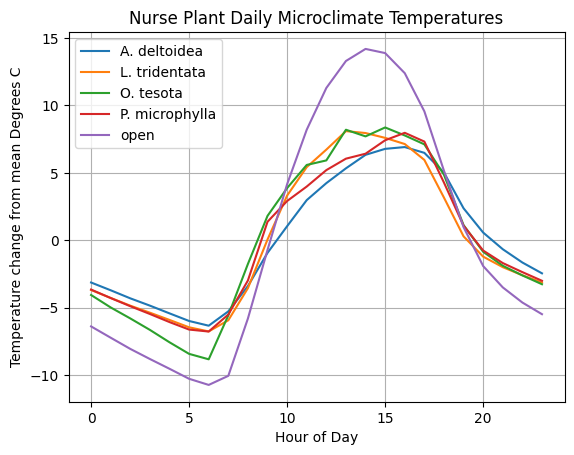

In [14]:
plt.plot(total_df[total_df.plant == 'A. deltoidea'].hour, total_df[total_df.plant == 'A. deltoidea'].adjusted_mean, label = 'A. deltoidea')
plt.plot(total_df[total_df.plant == 'L. tridentata'].hour, total_df[total_df.plant == 'L. tridentata'].adjusted_mean, label = 'L. tridentata')
plt.plot(total_df[total_df.plant == 'O. tesota'].hour, total_df[total_df.plant == 'O. tesota'].adjusted_mean, label = 'O. tesota')
plt.plot(total_df[total_df.plant == 'P. microphylla'].hour, total_df[total_df.plant == 'P. microphylla'].adjusted_mean, label = 'P. microphylla')
plt.plot(total_df[total_df.plant == 'open'].hour, total_df[total_df.plant == 'open'].adjusted_mean, label = 'open')
plt.legend()
plt.grid()
plt.ylabel('Temperature change from mean Degrees C')
plt.xlabel('Hour of Day')
plt.title('Nurse Plant Daily Microclimate Temperatures')
plt.show()

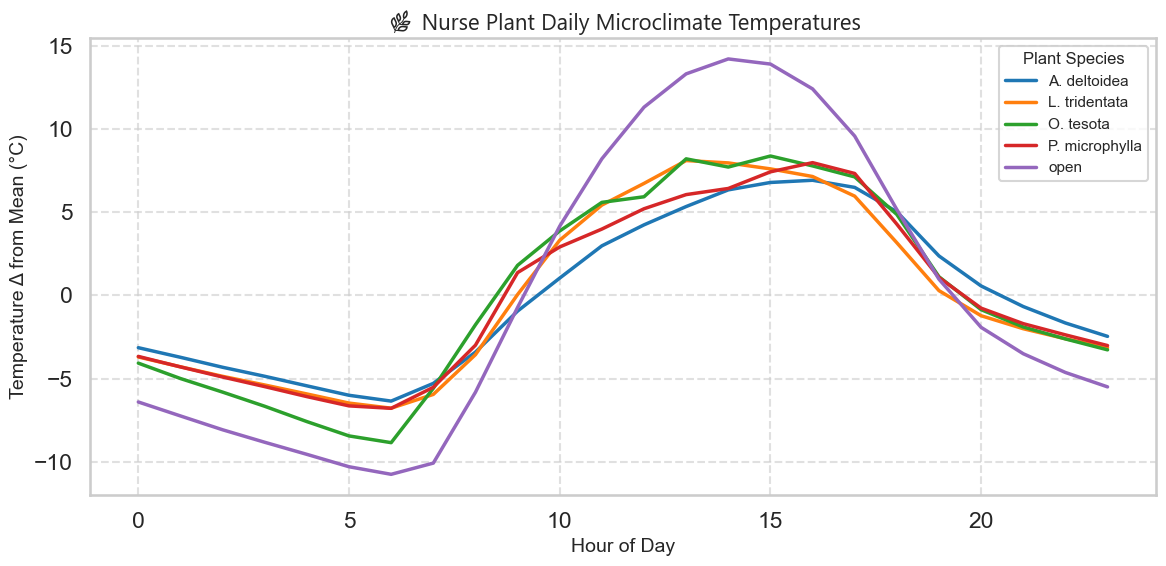

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Use a clean seaborn style
sns.set(style="whitegrid", context="talk", palette="Set2")

# Set figure size
plt.figure(figsize=(12, 6))

# Optional: define a consistent color palette
colors = {
    'A. deltoidea': '#1f77b4',
    'L. tridentata': '#ff7f0e',
    'O. tesota': '#2ca02c',
    'P. microphylla': '#d62728',
    'open': '#9467bd'
}

# Plot each plant
plants = total_df.plant.unique()
for plant in plants:
    subset = total_df[total_df.plant == plant]
    plt.plot(subset.hour, subset.adjusted_mean, label=plant, linewidth=2.5, color=colors.get(plant, None))

# Labels and title
plt.ylabel('Temperature Î” from Mean (Â°C)', fontsize=14)
plt.xlabel('Hour of Day', fontsize=14)
plt.title('ðŸŒ¿ Nurse Plant Daily Microclimate Temperatures', fontname="Segoe UI Emoji", fontsize=16, weight='bold')

# Legend
plt.legend(title="Plant Species", fontsize=11, title_fontsize=12, loc="best")

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

Clearly seeing difference between open and microclimate temperatures for the entirety of the study period.  Nurse plant microclimates are cooler during the day but warmer at night. 

## By location

In [15]:
# Producing daily hour temps for each plant by location
loc_df = df.groupby(['location', 'plant', 'hour']).temp.mean().reset_index()

In [16]:
loc_df.head()

location         plant  hour       temp
0  Cottonwood Creek  A. deltoidea     0  31.114286
1  Cottonwood Creek  A. deltoidea     1  29.977143
2  Cottonwood Creek  A. deltoidea     2  28.840952
3  Cottonwood Creek  A. deltoidea     3  27.875238
4  Cottonwood Creek  A. deltoidea     4  26.929524

In [17]:
# Obtaining mean temperatures for each plant by location 
loc_means = loc_df.groupby(['location', 'plant']).temp.mean().reset_index()
loc_means.rename(columns = {'temp' : 'mean_temp'}, inplace = True)
loc_means.head()

location           plant  mean_temp
0      Cottonwood Creek    A. deltoidea  36.945754
1      Cottonwood Creek  P. microphylla  35.929286
2      Cottonwood Creek            open  38.493452
3  White Tank Mountains    A. deltoidea  30.153144
4  White Tank Mountains   L. tridentata  30.246831

In [18]:
loc_df = loc_df.merge(loc_means, left_on = ['location', 'plant'], right_on = ['location', 'plant'])

In [19]:
# Subtracting mean to get daily temperature change from mean
loc_df['temp_diff'] = loc_df.temp - loc_df.mean_temp

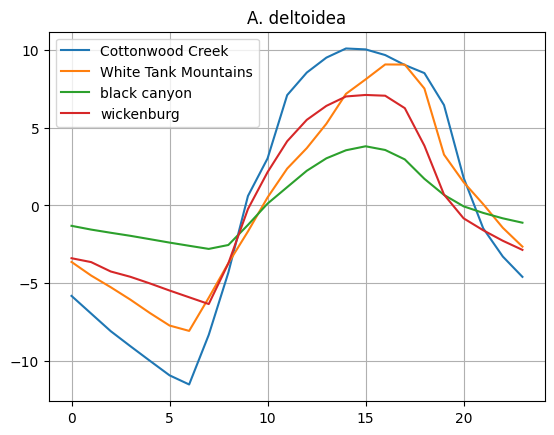

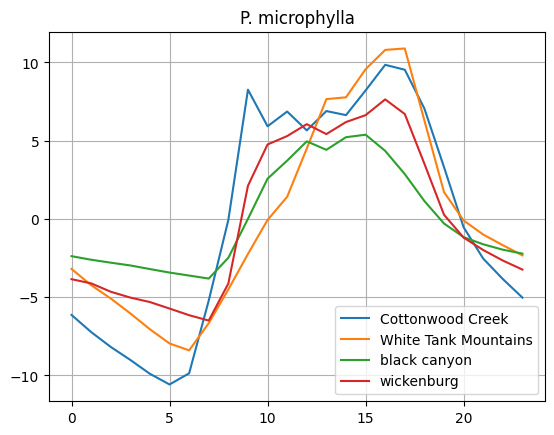

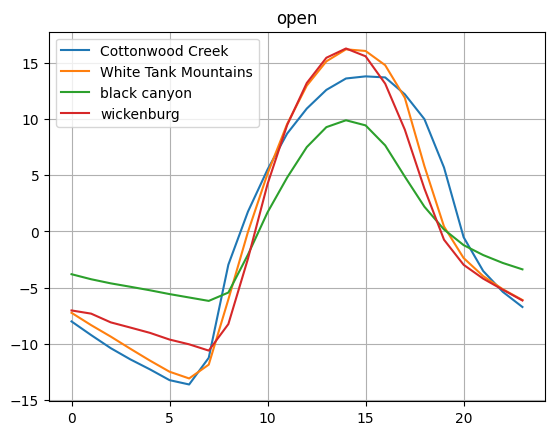

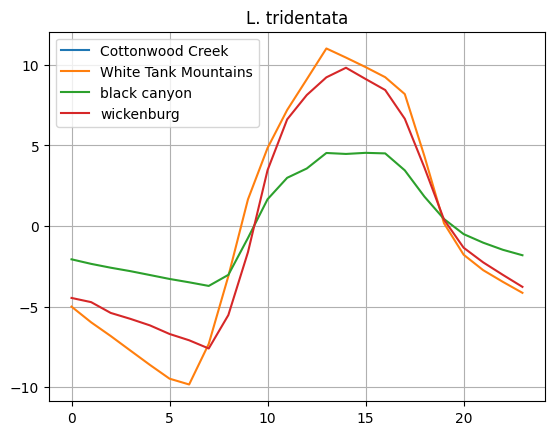

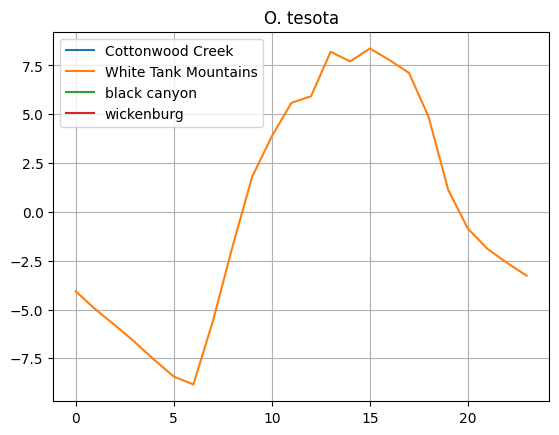

In [20]:
for j in loc_df.plant.unique():
    for i in loc_df.location.unique():
        plt.plot(loc_df[(loc_df.plant == j) & (loc_df.location == i)].hour , loc_df[(loc_df.plant == j) & (loc_df.location == i)].temp_diff, label = i)
    plt.legend()
    plt.title(j)
    plt.grid()
    plt.show()

Daily temperature fluctuations differ between the different locations for each plant.  This is due to the different time of year temperatures were collected at each location.

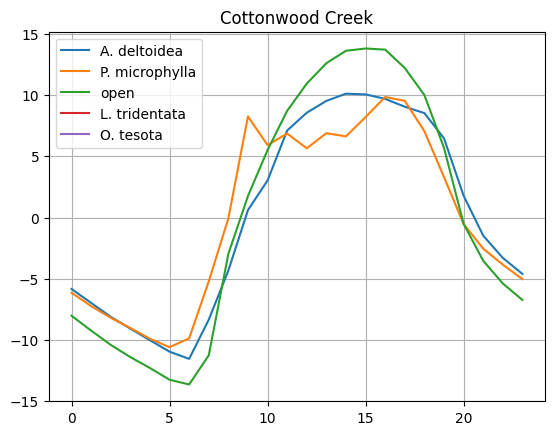

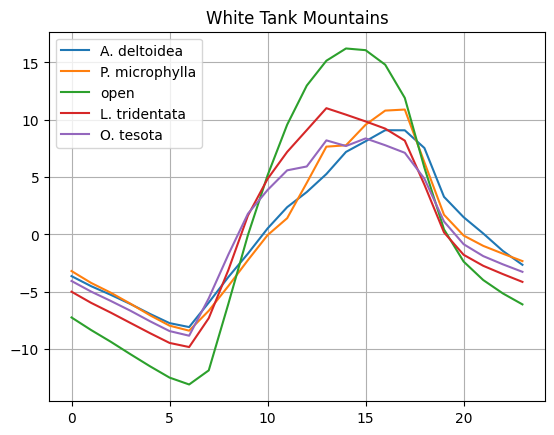

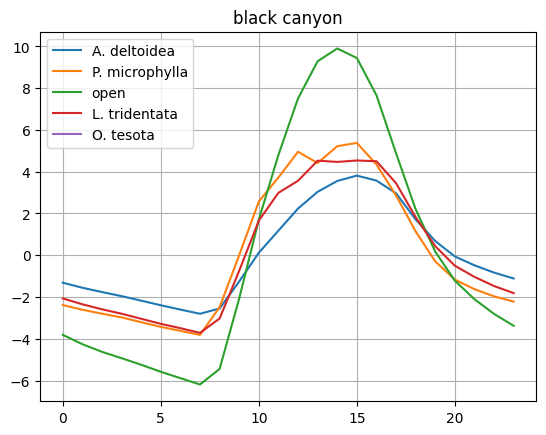

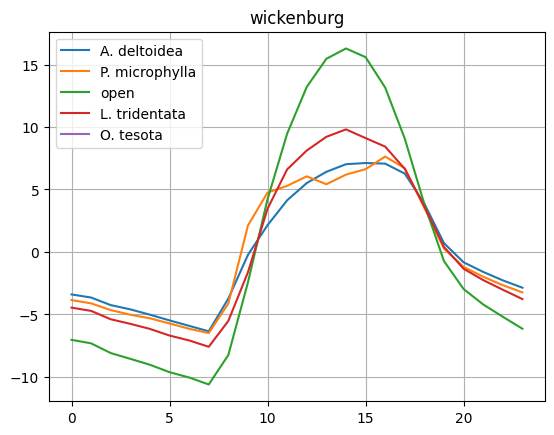

In [21]:
for j in loc_df.location.unique():
    for i in loc_df.plant.unique():
        plt.plot(loc_df[(loc_df.plant == i) & (loc_df.location == j)].hour , loc_df[(loc_df.plant == i) & (loc_df.location == j)].temp_diff, label = i)
    plt.legend()
    plt.title(j)
    plt.grid()
    plt.show()

Daily temperature fluctuations follow similar patterns for each location.  Open temperatures have consistently daily highs and lower daily lows.  Range of temperature changes varies from one location to another, likely due to different time of year each location was sampled.  

In [22]:
# Looking at timeframes each location was sampled
for i in df.location.unique():
    print(i, 'first time:', df[df.location == i].time.min(), 'Last time:', df[df.location == i].time.max())
    print()

black canyon first time: 2023-01-02 16:00:00 Last time: 2023-03-25 00:00:00

Cottonwood Creek first time: 2025-06-07 08:00:00 Last time: 2025-07-12 08:00:00

wickenburg first time: 2022-02-12 13:00:00 Last time: 2022-03-15 16:00:00

White Tank Mountains first time: 2022-03-18 00:00:00 Last time: 2022-06-09 00:00:00



In [23]:
df.time.dt.dayofyear.nunique()

192

In [24]:
df[df.temp == df.temp.max()]

time  temp sensor plant              location  month  \
42875 2022-06-08 13:00:00  68.6  open2  open  White Tank Mountains      6   

       hour  
42875    13

In [25]:
 df[df.temp == df.temp.min()]

time  temp sensor plant    location  month  hour
27370 2022-02-24 07:00:00  -1.0  open1  open  wickenburg      2     7
28114 2022-02-24 07:00:00  -1.0  open2  open  wickenburg      2     7

The open microclimate outside of the influence had both the highest and lowest temperatures in the study.  

## Summer vs. winter

In [26]:
# Comparing cool season to hot season nurse plant influences by dividing up dataframe
winter = pd.DataFrame(df[df.month.isin([1, 2])])
summer = pd.DataFrame(df[df.month.isin([5, 6, 7])])

In [27]:
summer.shape

(20575, 7)

In [28]:
winter.shape

(20031, 7)

In [29]:
winter.head()

time  temp sensor plant      location  month  hour
0 2023-01-02 16:00:00  13.4  open2  open  black canyon      1    16
1 2023-01-02 17:00:00  11.5  open2  open  black canyon      1    17
2 2023-01-02 18:00:00   9.9  open2  open  black canyon      1    18
3 2023-01-02 19:00:00   8.9  open2  open  black canyon      1    19
4 2023-01-02 20:00:00   8.3  open2  open  black canyon      1    20

In [30]:
# Finding overall means for standardizing temperature changes for different seasons
w_mean = winter.temp.mean()
s_mean = summer.temp.mean()

In [31]:
# Finding hourly means for each plant for each season
summer_means = summer.groupby(['plant', 'hour']).temp.mean().reset_index()
winter_means = winter.groupby(['plant', 'hour']).temp.mean().reset_index()

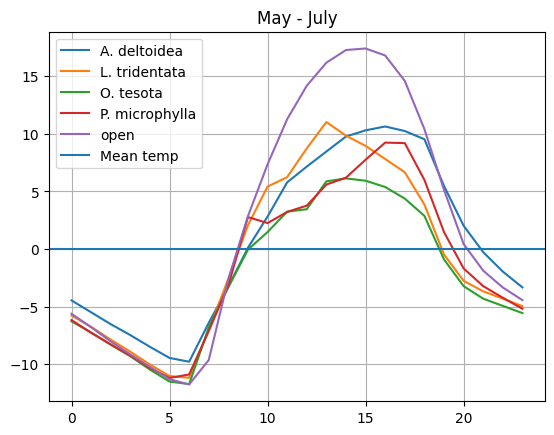

In [32]:
# Plotting daily temperature change for hot season
for i in summer_means.plant.unique(): 
    plt.plot(summer_means[summer_means.plant == i].hour, summer_means[summer_means.plant == i].temp - s_mean, label = i)
plt.grid()
plt.axhline(0, label = 'Mean temp')
plt.title('May - July')
plt.legend()
plt.show()

It appears nurse plants protect more against daily highs in the summer but there are similar daily lows between nurse plants and open temperatures.  

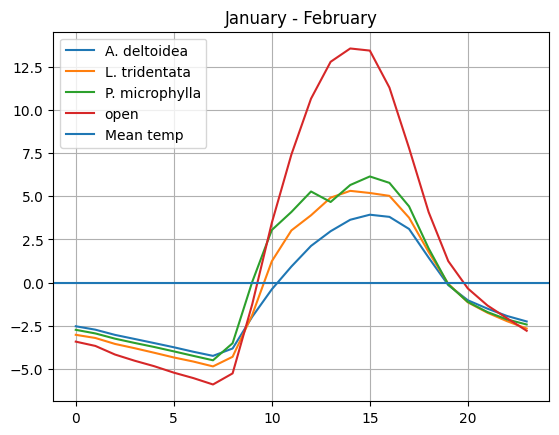

In [33]:
# Plotting daily temperature change for winter months
for i in winter_means.plant.unique(): 
    plt.plot(winter_means[winter_means.plant == i].hour, winter_means[winter_means.plant == i].temp - w_mean, label = i)
plt.grid()
plt.axhline(0, label = 'Mean temp')
plt.title('January - February')
plt.legend()
plt.show()

Nurse plants appear to protect against both daily highs and lows compared to open areas outside of nurse plant influence.  

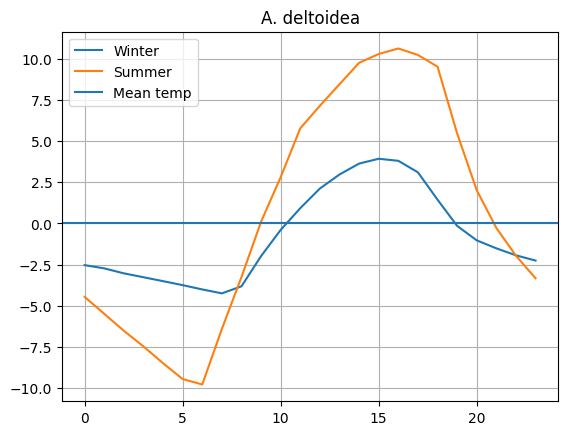

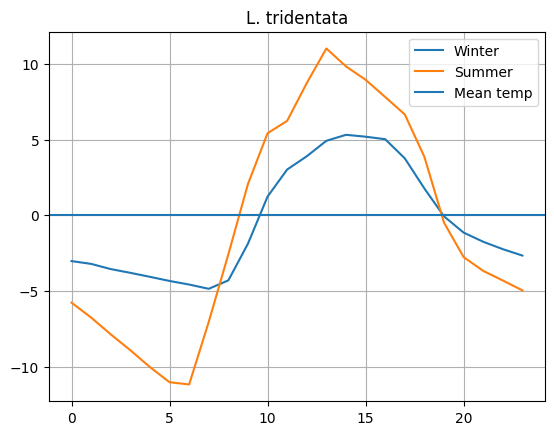

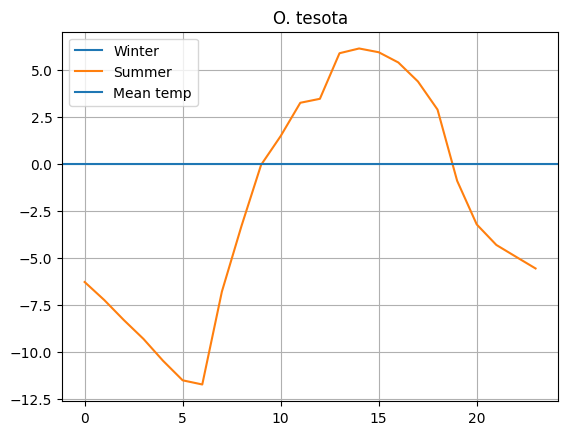

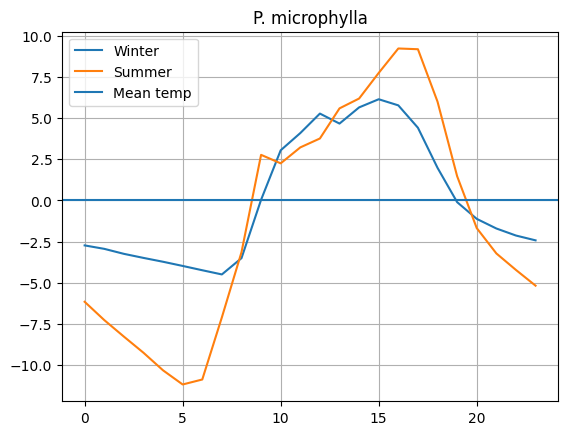

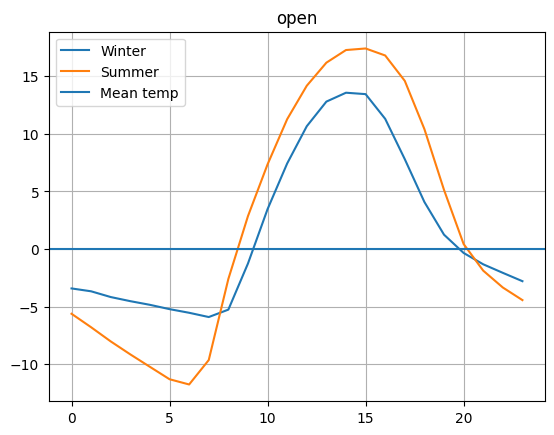

In [34]:
# Comparing hourly temperature changes for each plant by season
for i in summer_means.plant.unique(): 
    plt.plot(winter_means[winter_means.plant == i].hour, winter_means[winter_means.plant == i].temp - w_mean, label = 'Winter')
    plt.plot(summer_means[summer_means.plant == i].hour, summer_means[summer_means.plant == i].temp - s_mean, label = 'Summer')
    plt.grid()
    plt.axhline(0, label = 'Mean temp')
    plt.title(i)
    plt.legend()
    plt.show()

Summer temperatures fluctuate significantly more for all microclimates.

In [35]:
# finding mean open habitat temperatures
summer_open = summer_means[summer_means.plant == 'open'][['hour', 'temp']]
winter_open = winter_means[winter_means.plant == 'open'][['hour', 'temp']]

In [36]:
summer_open.rename(columns = {'temp' : 'open_temp'}, inplace = True)
winter_open.rename(columns = {'temp' : 'open_temp'}, inplace = True)

In [37]:
# Finding difference between open and nurse plant temperatures
summer_diffs = summer_means.merge(summer_open, left_on = 'hour', right_on = 'hour', how = 'left')
winter_diffs = winter_means.merge(winter_open, left_on = 'hour', right_on = 'hour', how = 'left')

summer_diffs['diff_from_open'] = summer_diffs.temp - summer_diffs.open_temp
winter_diffs['diff_from_open'] = winter_diffs.temp - winter_diffs.open_temp

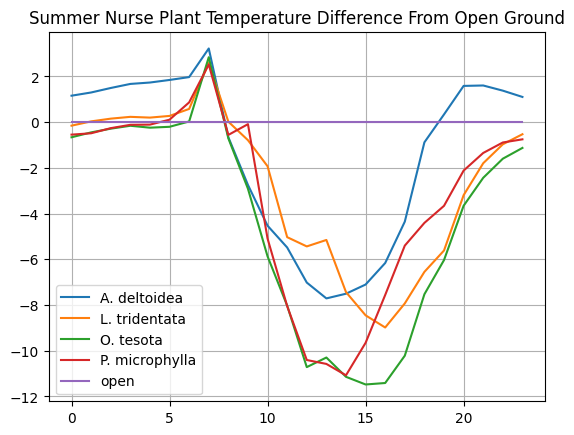

In [38]:
# Plotting difference between open and nurse plant temperatures
for i in summer_diffs.plant.unique():
    plt.plot(summer_diffs[summer_diffs.plant == i].hour, summer_diffs[summer_diffs.plant == i].diff_from_open, label = i)
plt.grid()
plt.title('Summer Nurse Plant Temperature Difference From Open Ground')
plt.legend()
plt.show()

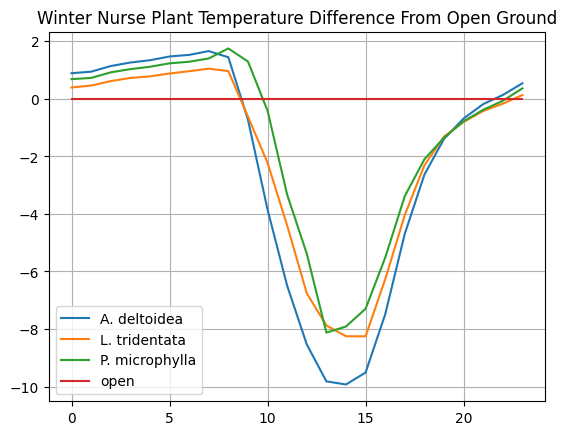

In [39]:
for i in winter_diffs.plant.unique():
    plt.plot(winter_diffs[winter_diffs.plant == i].hour, winter_diffs[winter_diffs.plant == i].diff_from_open, label = i)
plt.grid()
plt.title('Winter Nurse Plant Temperature Difference From Open Ground')
plt.legend()
plt.show()

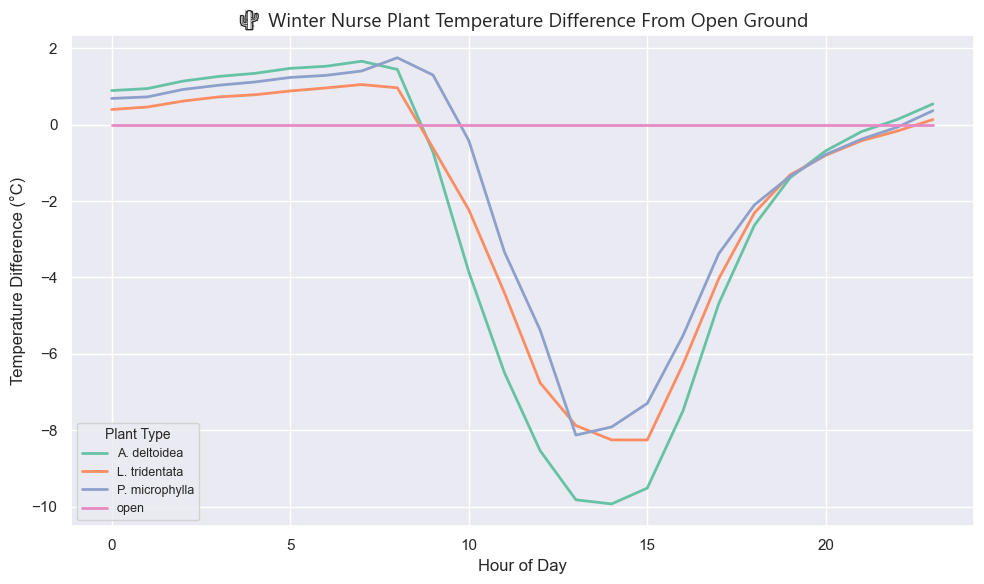

In [86]:
# Optional: Set a Seaborn style for better aesthetics
sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))  # Adjust the figure size for readability

# Define a color palette
colors = sns.color_palette("Set2", n_colors=winter_diffs.plant.nunique())

# Plot each line with a unique color
for i, color in zip(winter_diffs.plant.unique(), colors):
    subset = winter_diffs[winter_diffs.plant == i]
    plt.plot(
        subset.hour,
        subset.diff_from_open,
        label=i,
        color=color,
        linewidth=2,
        #marker='o',  # optional: add markers
        markersize=4
    )

# Titles and axis labels
plt.title("ðŸŒµ Winter Nurse Plant Temperature Difference From Open Ground", fontname="Segoe UI Emoji", fontsize=14, weight='bold')
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Temperature Difference (Â°C)", fontsize=12)

# Grid and legend
plt.grid(True, linestyle='-', alpha=1)
plt.legend(title="Plant Type", loc="best", fontsize=9, title_fontsize=10)

# Tight layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()


# Statistical analysis

Will be conducting a paired test comparing daily max, min, and range by day of year at each location. 

In [41]:
df['day_of_year'] = df.time.dt.dayofyear

In [42]:
# Finding max and min by day of year, location, and plant
max_df = df.groupby(['plant', 'location', 'day_of_year']).temp.max().reset_index()
min_df = df.groupby(['plant', 'location', 'day_of_year']).temp.min().reset_index()

In [43]:
max_df.rename(columns = {'temp' : 'max_temp'}, inplace = True)
min_df.rename(columns = {'temp' : 'min_temp'}, inplace = True)

In [44]:
stats_df = max_df.merge(min_df, left_on = ['plant', 'location', 'day_of_year'], right_on = ['plant', 'location', 'day_of_year'])
stats_df.shape

(988, 5)

In [45]:
# Finding daily temp range
stats_df['temp_range'] = stats_df.max_temp - stats_df.min_temp

In [46]:
open_temps = pd.DataFrame(stats_df[stats_df.plant == 'open'])
open_temps.rename(columns = {'max_temp' : 'open_max_temp', 'min_temp' : 'open_min_temp', 'temp_range' : 'open_temp_range'}, inplace = True)
open_temps.drop(columns = 'plant', inplace = True)

In [47]:
stats_df = stats_df.merge(open_temps, on = ['location', 'day_of_year'])
stats_df.shape

(988, 9)

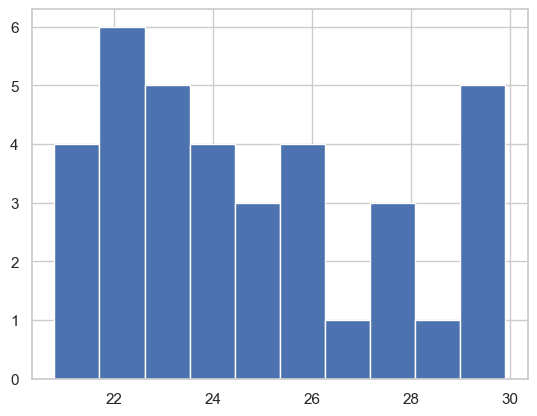

In [48]:
# Exploring data distribution
plt.hist(stats_df[(stats_df.location == 'Cottonwood Creek') & (stats_df.plant == 'A. deltoidea')].min_temp)
plt.show()

When checked, nearly all data has a non-normal distribution so non-parametric tests will be used.  Will do 10,000 permutations of comparing nurse plant temps to open temps.  

In [49]:
# Paired permutation test to see if there is a difference between nurse plant temp and open habitat
print('Max daily temperatures difference between nurse plant to open')
for i in stats_df.plant.unique():
    differences = stats_df[stats_df.plant == i]['open_max_temp'] - stats_df[stats_df.plant == i]['max_temp']
    observed_stat = differences.mean()
    n_permutations = 10000
    perm_stats = []
    for _ in range(n_permutations):
        signs = np.random.choice([-1, 1], size=len(differences))
        permuted_diff = differences * signs
        perm_stats.append(permuted_diff.mean())
    perm_stats = np.array(perm_stats)
    #p_value = np.mean(perm_stats >= observed_stat)
    p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))
    print(i, f"observed mean difference from open: {observed_stat:.4f}", f"P-value: {p_value:.8f}")

Max daily temperatures difference between nurse plant to open
A. deltoidea observed mean difference from open: 8.0081 P-value: 0.00000000
L. tridentata observed mean difference from open: 4.3372 P-value: 0.00000000
O. tesota observed mean difference from open: 9.7179 P-value: 0.00000000
P. microphylla observed mean difference from open: 6.2851 P-value: 0.00000000
open observed mean difference from open: 0.0000 P-value: 1.00000000


In [50]:
print('Minimum daily temperatures difference between nurse plant to open')
for i in stats_df.plant.unique():
    differences = stats_df[stats_df.plant == i]['min_temp'] - stats_df[stats_df.plant == i]['open_min_temp']
    observed_stat = differences.mean()
    n_permutations = 10000
    perm_stats = []
    for _ in range(n_permutations):
        signs = np.random.choice([-1, 1], size=len(differences))
        permuted_diff = differences * signs
        perm_stats.append(permuted_diff.mean())
    perm_stats = np.array(perm_stats)
    #p_value = np.mean(perm_stats >= observed_stat)
    p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))
    print(i, f"observed mean difference from open: {observed_stat:.4f}", f"P-value: {p_value:.8f}")

Minimum daily temperatures difference between nurse plant to open
A. deltoidea observed mean difference from open: 1.5804 P-value: 0.00000000
L. tridentata observed mean difference from open: 0.7196 P-value: 0.00000000
O. tesota observed mean difference from open: 1.6560 P-value: 0.00000000
P. microphylla observed mean difference from open: 0.5945 P-value: 0.00000000
open observed mean difference from open: 0.0000 P-value: 1.00000000


In [51]:
print('Daily temperature range difference between nurse plant to open')
for i in stats_df.plant.unique():
    differences = stats_df[stats_df.plant == i]['open_temp_range'] - stats_df[stats_df.plant == i]['temp_range']
    observed_stat = differences.mean()
    n_permutations = 10000
    perm_stats = []
    for _ in range(n_permutations):
        signs = np.random.choice([-1, 1], size=len(differences))
        permuted_diff = differences * signs
        perm_stats.append(permuted_diff.mean())
    perm_stats = np.array(perm_stats)
    #p_value = np.mean(perm_stats >= observed_stat)
    p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))
    print(i, f"observed mean difference from open: {observed_stat:.4f}", f"P-value: {p_value:.8f}")

Daily temperature range difference between nurse plant to open
A. deltoidea observed mean difference from open: 9.5885 P-value: 0.00000000
L. tridentata observed mean difference from open: 5.0568 P-value: 0.00000000
O. tesota observed mean difference from open: 11.3738 P-value: 0.00000000
P. microphylla observed mean difference from open: 6.8796 P-value: 0.00000000
open observed mean difference from open: 0.0000 P-value: 1.00000000


# Model imputation

In [52]:
wide_df = df[df.plant == 'open'].groupby(['day_of_year', 'hour']).temp.mean().reset_index()
wide_df.rename(columns = {'temp' : 'open_temp'}, inplace = True)

for i in ['L. tridentata', 'A. deltoidea', 'P. microphylla', 'O. tesota']: 
    temp_df = df[df.plant == i].groupby(['day_of_year', 'hour']).temp.mean().reset_index()
    temp_df.rename(columns = {'temp' : (i + '_temp')}, inplace = True) 
    wide_df = wide_df.merge(temp_df, left_on = ['day_of_year', 'hour'], right_on = ['day_of_year', 'hour'], how = 'left')

In [53]:
wide_df.head()

day_of_year  hour  open_temp  L. tridentata_temp  A. deltoidea_temp  \
0            2    16      13.60           12.166667          11.833333   
1            2    17      11.70           11.133333          11.166667   
2            2    18      10.00            9.966667          10.200000   
3            2    19       9.00            9.233333           9.600000   
4            2    20       8.25            8.666667           9.133333   

   P. microphylla_temp  O. tesota_temp  
0                11.45             NaN  
1                10.50             NaN  
2                 9.50             NaN  
3                 8.90             NaN  
4                 8.40             NaN

In [54]:
wide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577 entries, 0 to 4576
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   day_of_year          4577 non-null   int32  
 1   hour                 4577 non-null   int32  
 2   open_temp            4577 non-null   float64
 3   L. tridentata_temp   3777 non-null   float64
 4   A. deltoidea_temp    4577 non-null   float64
 5   P. microphylla_temp  4576 non-null   float64
 6   O. tesota_temp       1993 non-null   float64
dtypes: float64(5), int32(2)
memory usage: 214.7 KB


In [55]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [56]:
# Initialize IterativeImputer with a regressor (e.g., BayesianRidge)
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)

# Fit and transform the data
X_imputed = imputer.fit_transform(wide_df)

In [57]:
X_imputed = pd.DataFrame(X_imputed)
X_imputed.columns = wide_df.columns

In [58]:
X_imputed.tail()

day_of_year  hour  open_temp  L. tridentata_temp  A. deltoidea_temp  \
4572        193.0   4.0  29.400000           30.409976          29.800000   
4573        193.0   5.0  28.633333           29.720504          29.133333   
4574        193.0   6.0  28.233333           29.271129          28.700000   
4575        193.0   7.0  29.533333           30.524129          30.466667   
4576        193.0   8.0  34.800000           34.244076          33.166667   

      P. microphylla_temp  O. tesota_temp  
4572            29.633333       30.911287  
4573            29.033333       30.441892  
4574            29.433333       30.313334  
4575            32.333333       31.558637  
4576            31.948316       33.951104

In [59]:
X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577 entries, 0 to 4576
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   day_of_year          4577 non-null   float64
 1   hour                 4577 non-null   float64
 2   open_temp            4577 non-null   float64
 3   L. tridentata_temp   4577 non-null   float64
 4   A. deltoidea_temp    4577 non-null   float64
 5   P. microphylla_temp  4577 non-null   float64
 6   O. tesota_temp       4577 non-null   float64
dtypes: float64(7)
memory usage: 250.4 KB


In [60]:
winter = pd.DataFrame(X_imputed[X_imputed.day_of_year <= 60])
summer = pd.DataFrame(X_imputed[X_imputed.day_of_year >= 133])

In [61]:
day_winter = winter.groupby('hour').mean()
day_summer = summer.groupby('hour').mean()
day_winter.drop(columns = 'day_of_year', inplace = True)
day_summer.drop(columns = 'day_of_year', inplace = True)

In [62]:
day_winter = day_winter - day_winter.mean()
day_summer = day_summer - day_summer.mean()

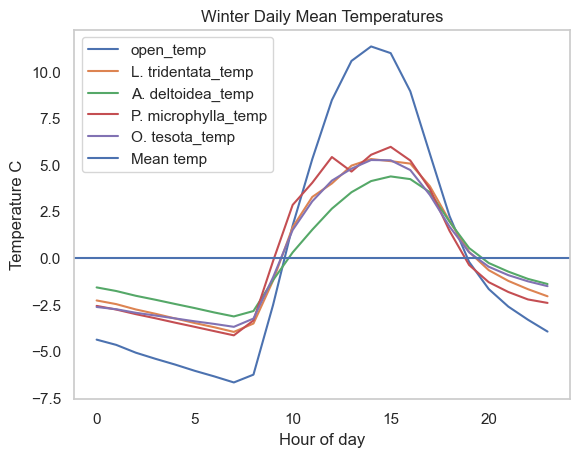

In [63]:
for i in day_winter.columns:
    plt.plot(day_winter.index, day_winter[i], label = i)
plt.grid()
plt.axhline(0, label = 'Mean temp')
plt.title('Winter Daily Mean Temperatures')
plt.ylabel('Temperature C')
plt.xlabel('Hour of day')
plt.legend()
plt.show()

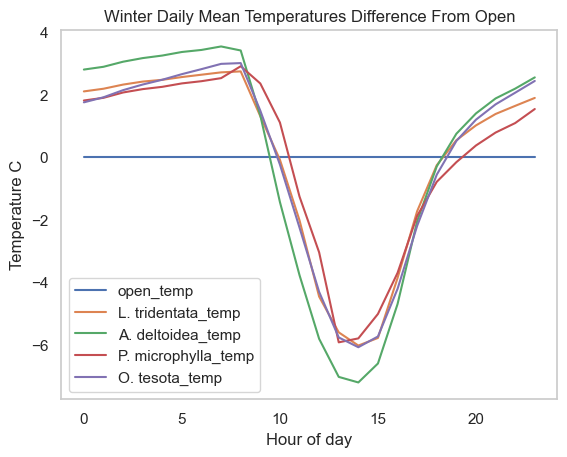

In [64]:
for i in day_winter.columns:
    plt.plot(day_winter.index, day_winter[i] - day_winter.open_temp, label = i)
plt.grid()
plt.title('Winter Daily Mean Temperatures Difference From Open')
plt.ylabel('Temperature C')
plt.xlabel('Hour of day')
plt.legend()
plt.show()

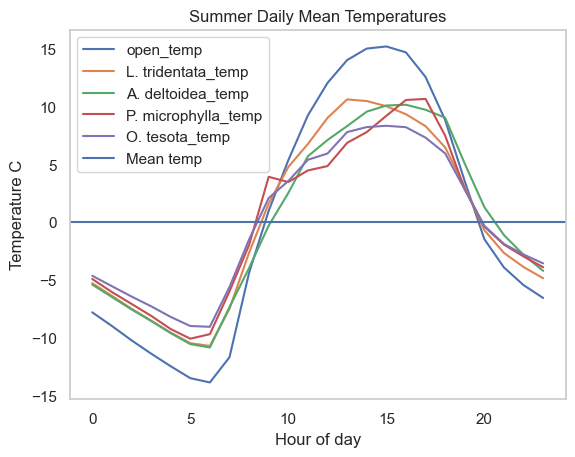

In [65]:
for i in day_summer.columns:
    plt.plot(day_summer.index, day_summer[i], label = i)
plt.grid()
plt.axhline(0, label = 'Mean temp')
plt.title('Summer Daily Mean Temperatures')
plt.ylabel('Temperature C')
plt.xlabel('Hour of day')
plt.legend()
plt.show()

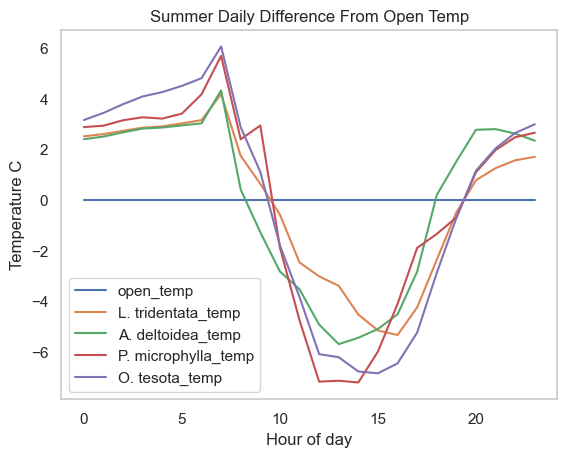

In [66]:
for i in day_summer.columns:
    plt.plot(day_summer.index, day_summer[i] - day_summer.open_temp, label = i)
plt.grid()
plt.title('Summer Daily Difference From Open Temp')
plt.ylabel('Temperature C')
plt.xlabel('Hour of day')
plt.legend()
plt.show()